# Complex Sentiment Analysis
### First 100 Days of Trump Presidency using UIC Sentiment Lexicon

#### Opening data files

The needed positive and negative word lists are .csv files found in the [PresidentSentiment/data](https://github.com/cyberdh/Text-Analysis/tree/master/PresidentSentiment/data) folder. You will need to move the word lists and data files to be in the same folder as the script file, or change the script so that the file path points to the folder where the word lists and data files are located.

##### NOTE: Make sure you have read and completed the instructions in [installJupyterMacPC.ipynb](https://github.com/cyberdh/Text-Analysis/blob/master/installJupyterMacPC.ipynb)



##### Now we load the negative words

Notice that we have added words to the negative list. Feel free to change the words you want to add based on the text you are doing sentiment analysis on. If you want to remove a word from the list simply add to the script the following line: If 'yourWord' in negTokens: negTokens.remove('yourWord'). If you do not wish to add words simply put a '#' (minus the quotes) in front of the lines that add words. These would be 'negAdds =' and 'negTokens.extend(negAdds)'.

##### NOTE: If you do not want to move the data files into the same folder as the script, you will need to add the path that leads to the folder where the file is located. For example: ("~/Text-Analysis/PresidentSentiment/data/negativeUIC.csv") where it says ("negativeUIC.csv"). This will work on Karst or Mac. If you are using a PC you will need to use an absolute path: ("C:\Text-Analysis\PresidentSentiment\data\negativeUIC.csv") and make sure you use the back slash (\) instead of forward slash (/).

In [1]:
import pandas as pd
import re


negText = pd.read_csv("negativeUIC.csv")
negTokens = negText['Neg'].tolist()
negAdds = ['whitesupremacists', 'kkk', 'whitenationalists', 'altright', 'altleft', 'maga', 'northkorea', 'fakenews', 'americanfacism', 'impeachtrump', 'nazi', 'nazis', 'neonazi', 'neonazis', 'firebannon'] 
negTokens.extend(negAdds)
print(negTokens[-10:])

['maga', 'northkorea', 'fakenews', 'americanfacism', 'impeachtrump', 'nazi', 'nazis', 'neonazi', 'neonazis', 'firebannon']


###### Now we load the positive words

Notice that we have added words to the positive word list and removed other words from the positive word list. Simply change the words if you wish to add different words and the same with the words being removed. If you do not wish to add or remove simply put a '#' (minus the quotes) in front of the lines that add words and/or the lines that remove words.

In [2]:
posText = pd.read_csv("positiveUIC.csv")
posTokens = posText['Pos'].tolist()
posAdds = ['theresistance','uniteblue']
posTokens.extend(posAdds)
if 'trump' in posTokens: posTokens.remove('trump')
if 'right' in posTokens: posTokens.remove('right')
print(posTokens[-10:])

['wowing', 'wows', 'yay', 'youthful', 'zeal', 'zenith', 'zest', 'zippy', 'theresistance', 'uniteblue']


###### Here we get the tweets

In [3]:
tweetsText = pd.read_csv("trump100days.csv")
tweetsText['text'] = tweetsText['text'].str.replace('[^\x00-\x7F]','')
tweetsText['text'] = tweetsText['text'].str.replace('[^\w\s]','')
tweetsTokens = tweetsText['text'].tolist()
print(tweetsTokens[:6])

['RT jmichaelkell To sum it up\r\r1 Trump  sexual predator\r2 Epstein  convicted pedophile\r3 Milo  pedophilia supporter\r4 Huckabee  p', 'RT DrDavidDuke Did John McCain wiretap President Trumps government phone and leak classified information to the press httpstcoNsSV', 'RT PrisonPlanet The Revolutionary Communist Partys SunsaraTaylor says Trump will enact global genocide\r\rLike communism which killed 9', 'Team Trump shares tips on keeping their boss distracted placated httpstco8UUV4TsQLa sure signs of NPD  Sad state of affairs', 'RT larryelder Rep MaxineWaters says Trumps cabinet picks are bunch of scumbags Is that better or worse than a basket of deplorable', 'CNNPolitics thats why Trump hired him stupid']


## Tokenizing the tweets

Now we will create two functions. The first for tokenizing a tweet, the second for calculating positive/negative words.

In [4]:
import re
def tokenizer(theText):
    theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
    return theTokens

def calculator(theTweet):
    # Count positive words
    numPosWords = 0
    theTweetTokens = tokenizer(theTweet)
    for word in theTweetTokens:
        if word in posTokens:
            numPosWords += 1
            
    # Count negative words
    numNegWords = 0
    for word in theTweetTokens:
        if word in negTokens:
            numNegWords += 1
    
    sum = (numPosWords - numNegWords)
    return sum

# Here is a line for testing this
# print(calculator('"RT @jmichaelkell: To sum it up:', '', '1. Trump - sexual predator', '2. Epstein - convicted pedophile', '3. Milo - pedophilia supporter', '4. Huckabee - pƒ"'))

## Analyzing tweets

Now we will use the calculator to calculate how many positive and negative tweets.
Note: that you can set a threshold for the number of words for a Tweet to be considered positive or negative.

In [5]:
# Here we set up the thresholds
posi = 0 # This means there have to be at least 1 positive word
nega = 0 # This means there has to be at least 1 negative words

# Here we prime our variables
numTweets = 0
numPosTweets = 0
numNegTweets = 0
numNeutTweets = 0

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = calculator(tweet)
    if calc > posi:
        numPosTweets += 1
        numTweets += 1
    elif calc < nega:
        numNegTweets += 1
        numTweets += 1
    else:
        numNeutTweets += 1
        numTweets += 1

# This prints out the results 
print("Total: " + str(numTweets) + "\n" + "Positive: " + str(numPosTweets) + "\n" + "Neutral: " + str(numNeutTweets) + "\n" + "Negative: " +str(numNegTweets))


Total: 244803
Positive: 45816
Neutral: 110805
Negative: 88182


#### Gathering positive tweets

This will gather all examples of positive tweets.

In [6]:
# Here we set up the threshold.
posi = 1 # This means there have to be more than 1 positive word
numberWanted = 4 # Here you decide how many tweets you want

# Here we prime our variables
numTweets = 0
numPosTweets = 0
posiTweetList = []

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = calculator(tweet)
    if calc > posi and numPosTweets < numberWanted:
        numPosTweets += 1
        posiTweetList.append(tweet)

print(posiTweetList)

['RT matthewjdowd In latest Quinnipiac poll by a 15 point margin voters trust the media more than Trump to tell the truth about important', 'RT TeaPainUSA Trump thinks its best for states to decide which people should be treated like humans  realDonaldTrump\r\rhttpstco35T', 'RT NewtTrump RETWEET THIS UNTIL THE MSM COVERS IT LIKE THEY DID FOR TRUMP\rExKKK head David Duke endorses keithellison for DNC I real', 'LibyaLiberty I would have loved the center to praise trump too BUT he did NOT  GIVE them reason to praise him']


#### Gathering negative tweets

This will gather examples of negative tweets.

In [7]:
# Here we set up the threshold.
nega = -1 # This means there have to be more than 1 positive word
numberWanted = 4 # Here you decide how many tweets you want

# Here we prime our variables
numTweets = 0
numNegTweets = 0
negaTweetList = []

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = calculator(tweet)
    if calc < nega and numNegTweets < numberWanted:
        numNegTweets += 1
        negaTweetList.append(tweet)

print(negaTweetList)

['RT alfonslopeztena Dumped by Trump jilted Europe and rejected Asia get together on trade deals threatening to leave US out in the cold\rh', 'RT RealJack Liberals are losing their mind over President Trumps deportations Real reason theyre upset is because theyre losing all t', 'RT ConstanceQueen8 30 to 40 Released \rFrom GITMO \rReturn 2 Terror\rWheres The Outrage \rTrump Inherits A Mess\rOf Obamas Decisions\rWarri', 'RT immigrant4trump VIDEO MichelleMalkin We Have To Stop Calling These Places Sanctuary Cities Theyre OUTLAW CITIES Maga TRUMP h']


#### Testing a tweet

Here you can take a tweet and test it to see how many positive or negative words it has.

In [8]:
tweetToCalc = input("What is the tweet to calculate? ")
print(calculator(tweetToCalc))

What is the tweet to calculate? love
1


#### Gathering and plotting positive and negative words

This will gather the words that are positive in the tweets and tabulate them.

In [9]:
import re
posWordsList = []
negWordsList = []

def tokenizer(theText):
    theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
    return theTokens

def wordsCalculator(theTweet):
    # Count positive words
    numPosWords = 0
    theTweetTokens = tokenizer(theTweet)
    for word in theTweetTokens:
        if word in posTokens:
            numPosWords += 1
            posWordsList.append(word)
            
    # Count negative words
    numNegWords = 0
    for word in theTweetTokens:
        if word in negTokens:
            numNegWords += 1
            negWordsList.append(word)

tweet2Process = input("What tweet do you want to process? ")
wordsCalculator(tweet2Process)
print("Positive words: " + str(posWordsList[:10]))
print("Negative words: " + str(negWordsList[:10]))

What tweet do you want to process? love
Positive words: ['love']
Negative words: []


## Gathering and plotting all positive and negative words

In [10]:
import re

# Here we set up the thresholds
posi = 1 # This means there have to be more than 1 positive word
nega = 0 # This means there has to be more than 1 negative words

# Here we prime our variables
posWordsList = []
negWordsList = []
numTweets = 0
numPosTweets = 0
numNegTweets = 0
numNeutTweets = 0

def wordsGathering(theTweet):
    # Count positive words
    numPosWords = 0
    theTweetTokens = tokenizer(theTweet)
    for word in theTweetTokens:
        if word in posTokens:
            numPosWords += 1
            posWordsList.append(word)
            
    # Count negative words
    numNegWords = 0
    for word in theTweetTokens:
        if word in negTokens:
            numNegWords += 1
            negWordsList.append(word)       
    
    sum = (numPosWords - numNegWords)
    return sum

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = wordsGathering(tweet)
    if calc > posi:
        numPosTweets += 1
        numTweets += 1
    elif calc < nega:
        numNegTweets += 1
        numTweets += 1
    else:
        numNeutTweets += 1
        numTweets += 1

print("Positive words: " + str(len(posWordsList)))
print("Negative words: " + str(len(negWordsList)))

Positive words: 95441
Negative words: 163884


###### Positive words

         like          good       support         great          well      approval theresistance          work           top     supporter 
         8501          2781          2621          2337          2225          1680          1623          1607          1424          1416 
              word  freq
2             like  8501
37            good  2781
21         support  2621
26           great  2337
55            well  2225
53        approval  1680
24   theresistance  1623
6             work  1607
33             top  1424
0        supporter  1416
60            love  1404
66             win  1322
17    intelligence  1296
3           better  1213
19             won  1109
44           thank  1068
12            best  1051
59          enough   986
129            wow   969
11           clear   930
74            free   893
4            trust   802
73         supreme   778
72         promise   753
79        promises   718


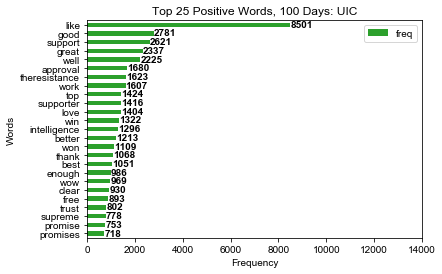

In [14]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

posDist = nltk.FreqDist(posWordsList)
posDist.tabulate(10)

%matplotlib inline
posit = Counter(posDist)
positdf = pd.DataFrame.from_dict(posit, orient='index').reset_index()
positdf = positdf.rename(columns={'index':'word', 0:'freq'})
positdf = positdf.sort_values('freq', ascending = False)
posdf = positdf[:25]
print(posdf)

fig = posdf.plot(x= posdf['word'],kind='barh', align='center', color =['C2'])
fig.set_ylabel('Words')
fig.set_xlabel('Frequency')
fig.set_title('Top 25 Positive Words, 100 Days: UIC')
fig.set_ylim(fig.get_ylim()[::-1])
fig.set_xlim(0,14000)

for i, v in enumerate(posdf['freq']):
    fig.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams["font.family"] = "sans-serif"
plt.savefig('/Users/klosteda/Box/cyberDH/TextAnalysis/sentimentAnalysis/Images/trump100PosWordsUICv2.png', format='png', dpi=300, bbox_inches='tight',)
plt.show()


###### Negative words

breaking     maga     fake   attack      bad  protest     lies     shit    wrong      lie 
    6601     3252     2635     2334     1870     1333     1287     1283     1272     1223 
           word  freq
32     breaking  6601
7          maga  3252
16         fake  2635
25       attack  2334
172         bad  1870
41      protest  1333
31         lies  1287
211        shit  1283
116       wrong  1272
205         lie  1223
145        hate  1221
248     illegal  1186
187      racist  1184
47      attacks  1178
136      strike  1067
198        hell  1051
192       fraud  1046
253       lying   992
78   resistance   984
110   collusion   962
209        fuck   938
44         lost   909
69         lied   908
175     treason   902
84      scandal   890


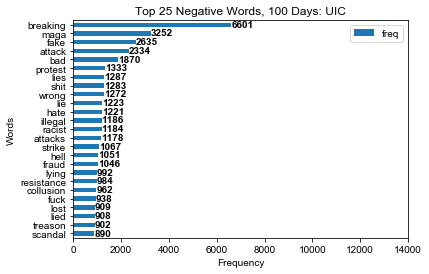

In [15]:
import nltk, matplotlib

negDist = nltk.FreqDist(negWordsList)
negDist.tabulate(10)

%matplotlib inline
nega = Counter(negDist)
negadf = pd.DataFrame.from_dict(nega, orient='index').reset_index()
negadf = negadf.rename(columns={'index':'word', 0:'freq'})
negadf = negadf.sort_values('freq', ascending = False)
negdf = negadf[:25]
print(negdf)

fig = negdf.plot(x= negdf['word'],kind='barh', align='center', color =['C0'])
fig.set_ylabel('Words')
fig.set_xlabel('Frequency')
fig.set_title('Top 25 Negative Words, 100 Days: UIC')
fig.set_ylim(fig.get_ylim()[::-1])
fig.set_xlim(0,14000)

for i, v in enumerate(negdf['freq']):
    fig.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams["font.family"] = "sans-serif"
plt.savefig('/Users/klosteda/Box/cyberDH/TextAnalysis/sentimentAnalysis/Images/trump100NegWordsUICv2.png', format='png', dpi=300, bbox_inches='tight',)

plt.show()